<B>Yash Gandhi 
    <br>IT

### **Note :**
* You will need the below 3 datasets to work on the questions : 
  * **ipl_matches.csv**
  * **ipl_batting.csv**
  * **ipl_deliveries.csv**

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
bat = pd.read_csv("./ipl_batting.csv")
dlv = pd.read_csv("./ipl_deliveries.csv")
mat = pd.read_csv("./ipl_matches.csv")

In [5]:
mat['Ground'].value_counts()

Mumbai                  96
Kolkata                 78
Delhi                   75
Bengaluru               69
Hyderabad (Deccan)      57
Chennai                 57
Jaipur                  47
Mohali                  44
Pune                    38
Durban                  16
Bengaluru, Bangalore    14
Visakhapatnam           13
Centurion               12
Ahmedabad               11
Mohali, Chandigarh      11
Cuttack                 10
Rajkot                  10
Dharamsala               9
Indore                   9
Johannesburg             8
Cape Town                8
Ranchi                   7
Dubai (DSC)              7
Port Elizabeth           7
Abu Dhabi                7
Hyderabad                7
Sharjah                  6
Raipur                   6
Kochi                    5
Mumbai (BS)              4
Kanpur                   4
East London              3
Kimberley                3
Nagpur                   3
Bloemfontein             2
Name: Ground, dtype: int64

### **Question 1**
Write **Python** code for the following
* Read the **ipl_matches.csv** dataset
* Display **data-type** of each column
* Define **granularity** for the dataset **ipl_matches**
* Write code to create a **primary key** as a **new column** for the dataset 
  * Convert match_date into the format **YYYYMMDD**
  * Depending upon whether the given match is the **1st** of **2nd** for the day, append a string **01 or 02** to the end
  * **Ex.** if 2 matches took place on 18-04-2009 then the primary key of the 1st match should look like **2009041801** and second match as **2009041802**
--------------------

In [3]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 13 columns):
match_date       763 non-null object
Ground           763 non-null object
Team 1           763 non-null object
Team 2           763 non-null object
Winner           763 non-null object
year             763 non-null int64
month            763 non-null int64
day              763 non-null int64
win_mode         743 non-null object
margin           763 non-null float64
toss_winner      763 non-null object
toss_decision    763 non-null object
match_no         763 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 77.6+ KB


<h3> year , month , day , match_no contribute to the granularity of the dataset

In [4]:
mat['match_date'].head()

0    2008-04-18
1    2008-04-19
2    2008-04-19
3    2008-04-20
4    2008-04-20
Name: match_date, dtype: object

In [5]:
mat['new_date']=mat.match_date.str.replace('-','')

In [6]:
mat.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,new_date
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,20080418
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,20080419
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,20080419
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,20080420
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,20080420


In [7]:
mat['primary_key']=''

In [8]:
for i in range(0,len(mat)):
    t='01'
    p='02'
    if i == 0:
            string=mat.loc[i,'new_date']
            mat.loc[i, 'primary_key'] = string+t
    else:
        
        if  mat.loc[i, 'new_date'] == mat.loc[i-1, 'new_date']:
            string=mat.loc[i,'new_date']
            mat.loc[i, 'primary_key'] = string+p
        else:
            string=mat.loc[i,'new_date']
            mat.loc[i, 'primary_key'] = string+t

In [9]:
mat.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,new_date,primary_key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,20080418,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,20080419,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,20080419,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,20080420,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,20080420,2008042002


### **Question 2** 
Let's look at the below statement : <br>
**It is said that you win half the match if you win the toss** <br><br>
So, let's understand to what extent teams who **won the toss** also **won the matches**
  * Write code to find out **% matches by team** (across all seasons) where they **won the toss**
  * What **% of matches** which the teams **won the toss also ended up winning the matches**?
  * Exhibit the above as a **% of total matches**
  * Which team tops the chart? Meaning which team took full advantage of the opportunity of winning the toss

**Ex :** If CSK played a total of **100** matches and won toss in **70** of them. This would mean **70%** of tosses were won by them. Now, if out of these 70 they ended up winning **28** of them then they won **40%** of the matches where they had won the toss. This is **28%** of total matches

In [10]:
mat['Team 2'].value_counts()

Mumbai Indians                 101
Kolkata Knight Riders           94
Kings XI Punjab                 88
Delhi Capitals                  86
Rajasthan Royals                84
Royal Challengers Bangalore     82
Chennai Super Kings             75
Sunrisers Hyderabad             56
Deccan Chargers                 37
Pune Warriors                   23
Rising Pune Supergiant          16
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: Team 2, dtype: int64

In [11]:
mat=mat.replace({'toss_winner':{'Rising Pune Supergiants':'Rising Pune Supergiant'}})

In [12]:
mat['Team 2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Delhi Capitals', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions'], dtype=object)

In [13]:
team=mat['Team 1'].unique().tolist()

In [14]:
dfnew = pd.DataFrame(columns=['Team', 'Matches', 'Won','%Won','Toss_won','%Toss_won','Won_match_&_toss',
                             '%Won_match_&_toss/Toss_won','%Won_match_&_toss/won','%Won_match_&_toss/Matches'])


In [15]:
for x in team:
    num=len(mat[(mat['Team 1'] == x) | (mat['Team 2'] == x)])
    toss=len(mat[mat['toss_winner'] == x])
    winner_withtoss=len(mat[(mat['toss_winner'] == x) & (mat['Winner'] == x)])
    winner=len(mat[mat['Winner']==x])
    
    wintoss=round(toss/num*100,2)
    win_mat_toss=round(winner_withtoss/toss*100,2)
    win_with_toss_percent= round(winner_withtoss/winner*100,2)
    win_mat=round(winner/num*100,2)    
    total  =round(winner_withtoss/num*100,2)
        
    dfnew = dfnew.append({'Team' : x, 'Matches' : num, 'Won' :winner,'%Won':win_mat,'Toss_won' : toss,'%Toss_won' : wintoss,
                          'Won_match_&_toss':winner_withtoss,'%Won_match_&_toss/Toss_won':win_mat_toss,'%Won_match_&_toss/won':win_with_toss_percent,'%Won_match_&_toss/Matches':total}, ignore_index=True)

dfnew= dfnew.sort_values(by = '%Won_match_&_toss/Toss_won' , ascending = False)    

In [16]:
dfnew.head(4)

,Team,Matches,Won,%Won,Toss_won,%Toss_won,Won_match_&_toss,%Won_match_&_toss/Toss_won,%Won_match_&_toss/won,%Won_match_&_toss/Matches
11,Gujarat Lions,30,13,43.33,15,50.00,10,66.67,76.92,33.33
7,Chennai Super Kings,166,100,60.24,89,53.61,57,64.04,57.00,34.34
12,Rising Pune Supergiant,30,15,50.00,13,43.33,8,61.54,53.33,26.67
3,Kolkata Knight Riders,181,91,50.28,92,50.83,53,57.61,58.24,29.28


<h3> From the above analysis it can be seen that Gujarat Lions, Chennai Super Kings and Rising Super Giants took the full advantage of winning the toss. <br> <br>The column '%Won_match_&_toss/Toss_won' Gives the %of matches won when the team has won the toss

### **Question 3** 
* List the names of the **top 10 batsmen** by total runs accumulated across all the seasons
  * The output should be stored in a list

--------------------------



In [17]:
new_df = bat.groupby(['batsmen'], sort=True).sum().reset_index()


In [18]:
new_df = new_df.sort_values(by = 'R', ascending = False)

In [19]:
new_df.head()

,batsmen,R,B,M,fours,sixes,SR,is_fielder_involved
487,V Kohli,5412.0,4112.0,4225.0,480.0,190.0,20030.77,100
424,SK Raina,5368.0,3915.0,3645.0,493.0,194.0,22585.81,126
366,RG Sharma,4898.0,3744.0,3665.0,431.0,194.0,20495.90,112
113,DA Warner,4706.0,3305.0,3929.0,458.0,181.0,15653.18,75
393,S Dhawan,4579.0,3669.0,3987.0,524.0,96.0,17638.07,87


In [20]:
blist=new_df['batsmen'].head(10).tolist()

In [21]:
blist

['V Kohli',
 'SK Raina',
 'RG Sharma',
 'DA Warner',
 'S Dhawan',
 'CH Gayle',
 'MS Dhoni',
 'RV Uthappa',
 'AB de Villiers',
 'G Gambhir']

### **Question 4**
* Visualize the **runs made vs balls faced** in a jointplot. You should do this for all batsmen who batted in the **IPL season 2017**

--------------------

In [22]:
bat['match_date'] = pd.to_datetime(bat['match_date'], errors='coerce')


In [23]:
bat['day'] = bat['match_date'].dt.day
bat['month'] = bat['match_date'].dt.month
bat['year'] = bat['match_date'].dt.year

In [24]:
df4=bat[bat.year ==  2017]

In [25]:
new_df4 =df4.groupby(['batsmen'], sort=True).sum().reset_index()
new_df4 = new_df4.sort_values(by = 'R', ascending = False)


In [26]:
new_df4[['batsmen','R','B']].head()

,batsmen,R,B
35,DA Warner,641.0,452.0
44,G Gambhir,498.0,389.0
108,S Dhawan,479.0,376.0
118,SPD Smith,472.0,387.0
113,SK Raina,442.0,307.0


In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
d1=new_df4['R']
d2 = new_df4['B']

C:\Users\Anu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.3,'Joint plot for Runs vs Balls for season 2017')

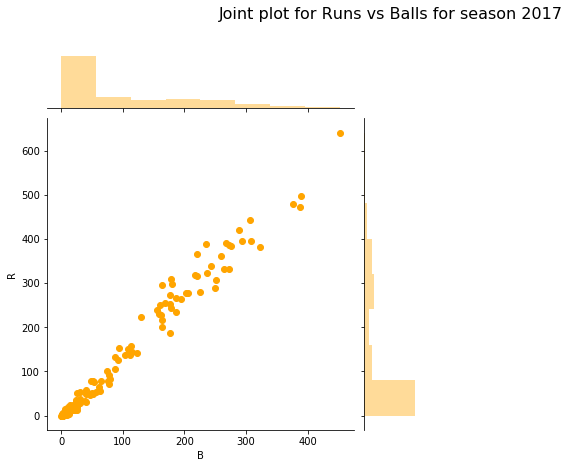

In [29]:
sns.jointplot(d2,d1,color='orange')
plt.title('Joint plot for Runs vs Balls for season 2017', y=1.3, fontsize = 16)

<h3> We can observe that it is almost a linear relation for R vs B 

### **Question 5**
* Create a new calculated column called **boundary_contribution**. It is calculated as : **(total runs made in 4s + 6s)/(total runs scored)**
* Create a scatter-plot between **boundary_contribution** and **strike_rate** where each dot represents an innings by a batsman
* Aggregate **boundary_contribution** by player and list down **top 10** players by boundary_contribution across all seasons
---------------------------------

In [30]:
df5=bat

In [31]:
df5['boundary_contribution'] = df5.apply(lambda row:  (row.fours * 4 +row.sixes*6)/row.R if row.R !=0 else 0, axis = 1) 

In [32]:
df5.head(1)

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,...,special_role,dismissal_mode,bowler_name,fielder,is_fielder_involved,match_date,day,month,year,boundary_contribution
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26.0,20.0,0.0,5.0,0.0,...,normal player,caught,Thushara,Hayden,1,2009-04-18,18.0,4.0,2009.0,0.769231


C:\Users\Anu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Scatter Plot of SR and Boundary contribution')

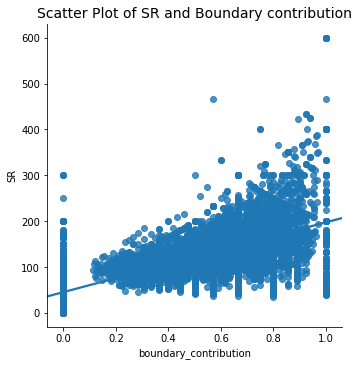

In [33]:
sns.lmplot('boundary_contribution','SR', data = df5, fit_reg = True)
plt.title('Scatter Plot of SR and Boundary contribution',fontsize=14)

In [34]:
new_df5 =df5.groupby(['batsmen'], sort=True).sum().reset_index()

In [35]:
new_df5['boundary_contribution'] = new_df5.apply(lambda row:  (row.fours * 4 +row.sixes*6)/row.R if row.R !=0 else 0, axis = 1) 

In [36]:
new_df5.head()

,batsmen,R,B,M,fours,sixes,SR,is_fielder_involved,day,month,year,boundary_contribution
0,A Ashish Reddy,280.0,193.0,262.0,17.0,14.0,3163.89,8,356.0,99.0,46313.0,0.542857
1,A Chandila,4.0,7.0,16.0,0.0,0.0,66.66,0,38.0,9.0,4025.0,0.000000
2,A Chopra,53.0,71.0,0.0,7.0,0.0,370.36,3,92.0,29.0,12049.0,0.528302
3,A Choudhary,25.0,20.0,30.0,1.0,1.0,491.66,1,37.0,13.0,6051.0,0.400000
4,A Dananjaya,4.0,5.0,0.0,0.0,0.0,80.00,0,14.0,4.0,2018.0,0.000000


In [37]:
new_df5 = new_df5.sort_values(by = 'boundary_contribution', ascending = False)

In [38]:
new_df5[['batsmen','R','boundary_contribution']].head(10)

,batsmen,R,boundary_contribution
71,BA Bhatt,6.0,1.000000
62,Avesh Khan,4.0,1.000000
382,RS Sodhi,4.0,1.000000
322,P Chopra,8.0,1.000000
493,VRV Singh,4.0,1.000000
154,GD McGrath,4.0,1.000000
239,L Ronchi,34.0,0.882353
486,Umar Gul,39.0,0.871795
180,J Arunkumar,23.0,0.869565
271,MDKJ Perera,14.0,0.857143


In [39]:
blist5=new_df5['batsmen'].head(10).tolist()
blist5

['BA Bhatt',
 'Avesh Khan',
 'RS Sodhi',
 'P Chopra',
 'VRV Singh',
 'GD McGrath',
 'L Ronchi',
 'Umar Gul',
 'J Arunkumar',
 'MDKJ Perera']

<h3> We can see that sorting the batsmen on boudary_contribution alone is not wise as the runs scored by the players say a different story

### **Question 6**
* List down **top 10** batsmen by **strike_rate** across all seasons. Plot the top 10 batsmen on a **bar chart**
* Repeat the above task for **bottom 10** batsmen
* Create a sub-plot with three sections. Show the below visuals in each : 
  * Box plot of **strike rates** of the top 10 batsmen listed in 1st part of the question
  * Box plot of **runs scored** of the top 10 batsmen
  * Box plot of **boundary_contribution** of the top 10 batsmen
----------------------------------

In [40]:
new_df6 =bat.groupby(['batsmen'], sort=True).sum().reset_index()

In [41]:
new_df6['player_SR'] = new_df6.apply(lambda row:  row.R*100/row.B if row.B !=0 else 0, axis = 1) 

In [42]:
new_df6 = new_df6.sort_values(by = 'player_SR', ascending = False)

In [43]:
new_df6[['batsmen','player_SR']].head(10)

,batsmen,player_SR
69,B Stanlake,250.000000
486,Umar Gul,205.263158
382,RS Sodhi,200.000000
33,AD Russell,186.418109
244,LJ Wright,176.666667
454,Shahid Afridi,176.086957
171,I Malhotra,175.000000
210,K Gowtham,173.493976
428,SM Curran,172.727273
434,SN Thakur,171.428571


In [44]:
new_df6[['batsmen','player_SR']].tail(10)


,batsmen,player_SR
221,KK Ahmed,0.0
199,JL Denly,0.0
90,C Nanda,0.0
56,Abdur Razzak,0.0
463,Sunny Gupta,0.0
488,V Pratap Singh,0.0
84,BW Hilfenhaus,0.0
87,C Ganapathy,0.0
481,U Kaul,0.0
173,IC Pandey,0.0


In [45]:
bar_plot=new_df6.head(10)

In [46]:
bar_plot2=new_df6.tail(10)

In [47]:
batsmen=bar_plot['batsmen'].tolist()

Text(0.5,1,'Bar graph for TOP 10 SR of batsmen')

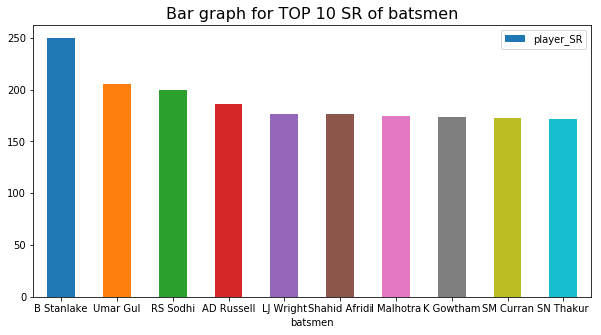

In [48]:
ax = bar_plot.plot.bar(x='batsmen', y='player_SR', rot=0,figsize=(10,5))
plt.title('Bar graph for TOP 10 SR of batsmen',fontsize=16)

Text(0.5,1,'Bar graph for Bottom 10 SR of batsmen')

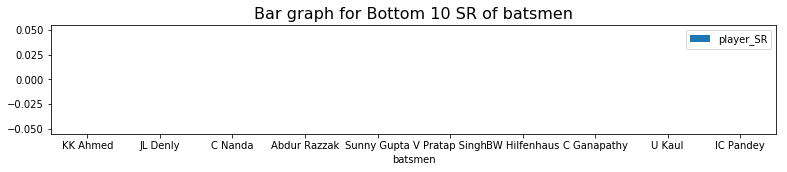

In [49]:
ax = bar_plot2.plot.bar(x='batsmen', y='player_SR', rot=0,figsize=(13,2))
plt.title('Bar graph for Bottom 10 SR of batsmen',fontsize=16)

In [50]:
bar_plot_runs=new_df.head(10)

In [51]:
bar_plot_bc=new_df5.head(10)

Text(0,2.4,'Bar graphs for TOP 10 SR,R,Boundary contribution of batsmen')

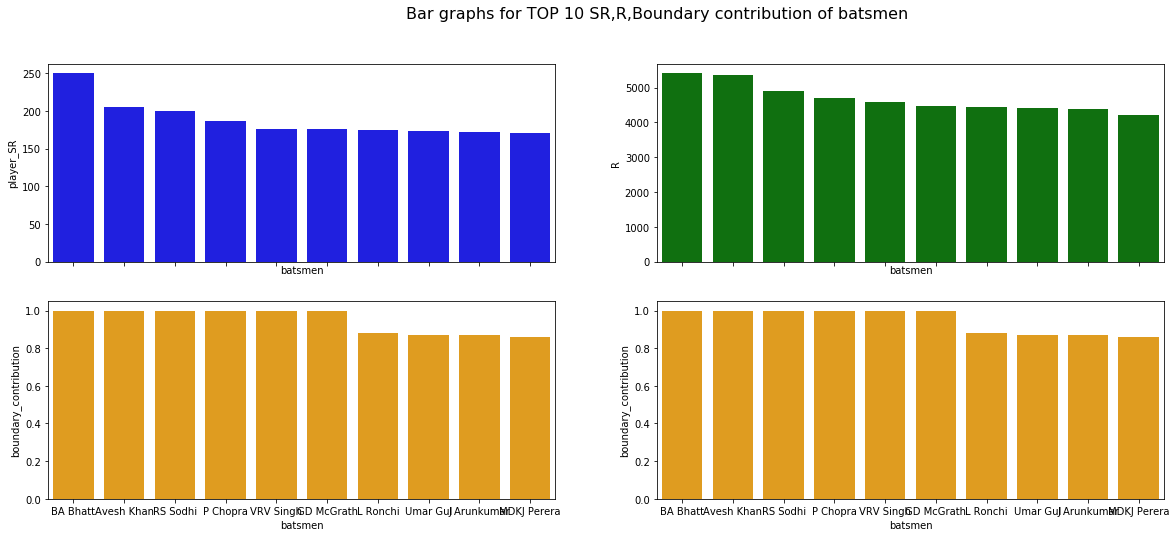

In [52]:
f, axes = plt.subplots(2,2,figsize=(20,8),sharex=True)
sns.barplot(x=bar_plot['batsmen'], y=bar_plot['player_SR'] , color="blue", ax = axes[0, 0])
sns.barplot(x=bar_plot_runs['batsmen'], y= bar_plot_runs['R'], color="green", ax = axes[0, 1])
sns.barplot(x=bar_plot_bc['batsmen'],y= bar_plot_bc['boundary_contribution'], color="orange", ax = axes[1, 0])
sns.barplot(x=bar_plot_bc['batsmen'],y= bar_plot_bc['boundary_contribution'], color="orange", ax = axes[1, 1])
plt.title('Bar graphs for TOP 10 SR,R,Boundary contribution of batsmen',y= 2.4, x = 0,fontsize=16)

### **Question 7**
* Create a new column called **dismissal_status**. Use the wicket_status column to extract values like **caught, lbw, bowled** etc. and store in dismissal_status column
* Extract the bowler name from the column **wicket_status** and store in a new column called **bowler_name**
* Extract fielder name from the **wicket_status** column and store in a new column called **fielder_name**
* Create a new column called **fielder_involved**. Set it to 1 if a fielder was involved in the dismissal else 0
* Create a **count plot** of player dismissals across the categories calculated above. Which category stands out from the rest?
------------------


<h3> Dismissal status and fielder involved is already present in the dataset

In [53]:
df7=bat

Text(0.5,1,'count plot for different categories of wickets')

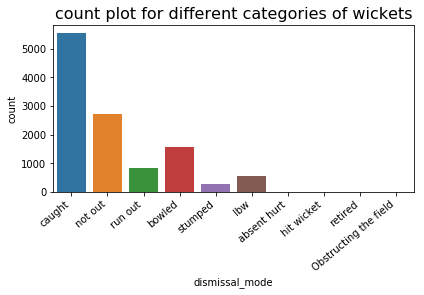

In [54]:
ax = sns.countplot(x=df7['dismissal_mode'], data=df7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('count plot for different categories of wickets',fontsize=16)

### **Question 8**
* Create a dataframe at a player level. Calculate below mentioned metrics :
  * #50s
  * #100s
  * #4s
  * #6s
  * Average
* Assign below points to the players based on the above metrics and calculate the total points earned : 
  * 1 half century = **5 points**
  * 1 century = **10 points**
  * 1 four = **2 point**
  * 1 six = **4 points**
  * Average > 30 = **20 points**
  * Average < 30 = **10 points**

* Rank the players based on total points earned. Now list down the top 10 batsmen overall across all IPL seasons
------------------


In [55]:
df8=bat

In [56]:
df8['scored_50'] = df8.apply(lambda row: 1 if row.R >= 50 and row.R <100 else 0, axis = 1)

In [57]:
df8['scored_100'] = df8.apply(lambda row: 1 if row.R >= 100 else 0, axis = 1)

In [58]:
df8['is_out'] = df8.apply(lambda row: 0 if row.dismissal_mode == 'not out' or
                          row.dismissal_mode == 'retired' or
                          row.dismissal_mode == 'absent hurt' else 1, axis = 1)

In [59]:
new_df8 = df8.groupby(['batsmen'], sort=True).sum().reset_index()

In [60]:
new_df8=new_df8[new_df8.is_out != 0]

In [61]:
new_df8['average'] = new_df8.apply(lambda row: round(row.R/row.is_out,2), axis = 1)

In [62]:
def conditions(s):
    score=0
    if (s['average'] < 30):
        score=10
    else:
        score=20
    
    score=score+5*s['scored_50']+10*s['scored_100']+2*s['fours']+4*s['sixes']
    return score 

In [63]:
new_df8['points'] = new_df8.apply(conditions, axis=1)


In [64]:
new = new_df8[['batsmen', 'scored_50', 'scored_100','fours','sixes','average','points']].copy()


In [65]:
new = new.sort_values(by = 'points', ascending = False)

In [66]:
new['points_ranked']=new['points'].rank(ascending=0,method='min')


In [67]:
new[['batsmen','points_ranked','points']].head(10)

,batsmen,points_ranked,points
95,CH Gayle,1.0,2260.0
424,SK Raina,2.0,1982.0
487,V Kohli,3.0,1970.0
113,DA Warner,4.0,1920.0
366,RG Sharma,5.0,1848.0
24,AB de Villiers,6.0,1777.0
393,S Dhawan,7.0,1637.0
385,RV Uthappa,8.0,1624.0
292,MS Dhoni,9.0,1565.0
442,SR Watson,10.0,1549.0


### **Question 9**
* Look for a column called **Special_role** to denote if a player is captain or not. 
* **Filter** the dataframe based on if a player is a captain.
* Pick all the innings by the captains (For **IPL 2019**) and plot a **box and whiskers plot** of **%run_contribution** per captain
  * Which captain do you think has played **captain's knock** most of the times? (purely going by % contribution to scorecard for now)
------------------


In [68]:
df9= bat[(bat['special_role'] == 'captain') & (bat['year'] == 2019)]


In [69]:
df9 = df9.groupby(['batsmen'], sort=True).sum().reset_index()

In [70]:
df9 = df9.sort_values(by = 'R', ascending = False)

In [71]:
total=df9['R'].sum()
total

1966.0

In [72]:
df9['%run_contribution'] = df9.apply(lambda row: round(row.R*100/total,2), axis = 1)

In [73]:
df9[['batsmen','%run_contribution']]

,batsmen,%run_contribution
9,V Kohli,23.60
8,SS Iyer,23.55
5,RG Sharma,20.60
0,AM Rahane,10.33
3,KS Williamson,7.93
7,SPD Smith,6.77
2,KA Pollard,4.22
4,R Ashwin,2.14
6,SK Raina,0.76
1,B Kumar,0.10


Text(0.5,1,'%Run Contribution of all the captains in 2019 in innings where the captains played')

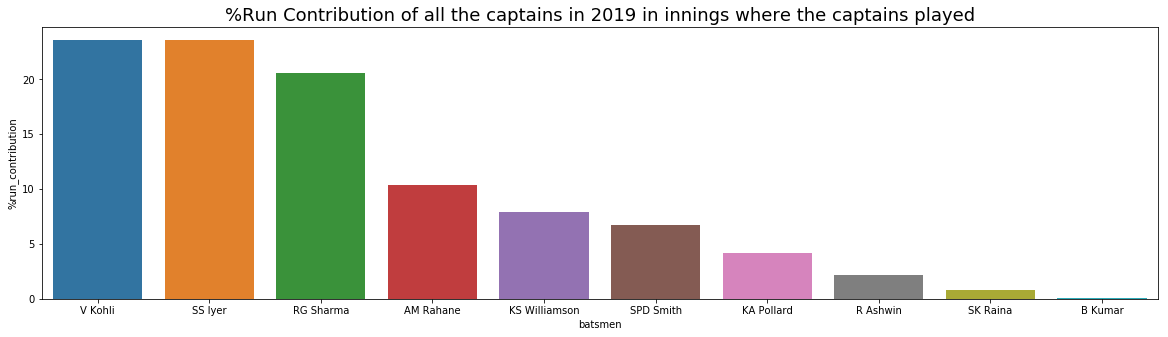

In [74]:
plt.figure(figsize=(20,5))
sns.barplot( x=df9["batsmen"], y=df9["%run_contribution"])
plt.title('%Run Contribution of all the captains in 2019 in innings where the captains played',fontsize=18)

<h3>It can be seen that V Kohli has played the captain's knock mostly

### **Question 10**
* Is IPL more in favor of batsmen?
* Let's consider two metrics **total_runs** made in a match and the **run_rate** of the match
* Create a **histogram** of **total_runs** by match. What kind of a **distribution** your discover?
* **Repeat** the above step for **run_rate** per match too
* Is the distribution **left skewed** or **right skewed**?
* Discuss your insights

------------------

In [75]:
df10=bat.groupby(['match_date'])

In [76]:
df10=bat.groupby(['match_date','match_no']).sum().reset_index()

In [77]:
df10['run_rate'] = df10.apply(lambda row: round(row.R/(row.B/6),2), axis = 1)

Text(0.5,1,'Histograms for total_runs in the match ')

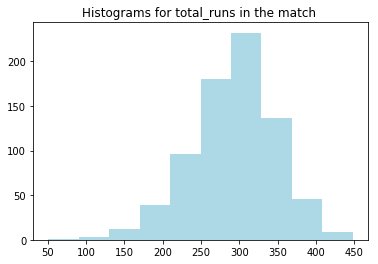

In [78]:
plt.hist(df10['R'],color = 'lightblue')
plt.title("Histograms for total_runs in the match ")


<h3> The histogram for totalruns in a match is right skewed ,meaning in the total score is around  300 most of the time

Text(0.5,1,'Histograms for runrate ')

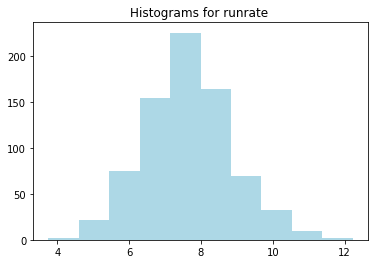

In [79]:
plt.hist(df10['run_rate'],color = 'lightblue')
plt.title("Histograms for runrate ")

<h3>The histogram has almost a normal distribution around 8.0
    <br>hence it can be conclude that in ipl batsmen have a edge over bowlers

In [80]:
df10[['match_date','match_no','R','B','run_rate']].head()

,match_date,match_no,R,B,run_rate
0,2008-04-18,1,268.0,211.0,7.62
1,2008-04-19,2nd match (D/N),430.0,241.0,10.71
2,2008-04-19,3rd match (N),244.0,211.0,6.94
3,2008-04-20,4th match (D/N),184.0,229.0,4.82
4,2008-04-20,5th match (N),315.0,238.0,7.94


### **Question 11**
* **Filter** the histogram (created in **Question 9**) for an **IPL season**. Ex. IPL 2016
* Also, filter the histogram for a **team** within a **season**. Ex. for CSK within IPL 2016
* **Describe** your observations. Think along the following **questions** : 
  * What is the meaning of **skewness**?
  * Is there an **observable difference** between the **rate of runs** scored for some teams over others?
    * Choose appropriate **visualization** to understand **run_rate** of teams (**Hint :** Violin charts)
    * Which teams are strong at making **large quantity** of runs?
    * Which teams are strong at making runs at a **quicker rate**? (Consider run a ball the **base line** for **under** or **over** indexing teams)

* **Note :** *A metric is said to be under-indexed when it's value is less than the baseline value. Similarly it is said to be over-indexed when it's value is more than the baseline value*

-------------------------
    

In [81]:
dlv = pd.read_csv("./new_deliveries.csv")


In [82]:
dlv.head(1)

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name
0,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN,980953.yaml


In [83]:
dlv.Match_id=dlv.Match_id.astype(str)

In [84]:
dlv['year'] = dlv['Match_id'].str[:4]

In [85]:
dlv.head(1)

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name,year
0,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN,980953.yaml,2016


In [86]:
dlv['Delivery']=1

In [87]:
df11=dlv[dlv['year']=='2008']

In [88]:
df11=df11.groupby(['Team']).sum().reset_index()


In [89]:
df11['RR']= df11.apply(lambda row:  round((row.Runs_total)/(row.Delivery/6),2), axis = 1)

In [90]:
df11=df11[['Team','RR','Runs_total']]

In [91]:
df11.head(10)

,Team,RR,Runs_total
0,Chennai Super Kings,8.07,2520
1,Deccan Chargers,8.02,2229
2,Delhi Daredevils,8.21,2118
3,Kings XI Punjab,8.50,2464
4,Kolkata Knight Riders,7.48,1942
5,Mumbai Indians,7.88,2080
6,Rajasthan Royals,8.39,2601
7,Royal Challengers Bangalore,7.17,1983


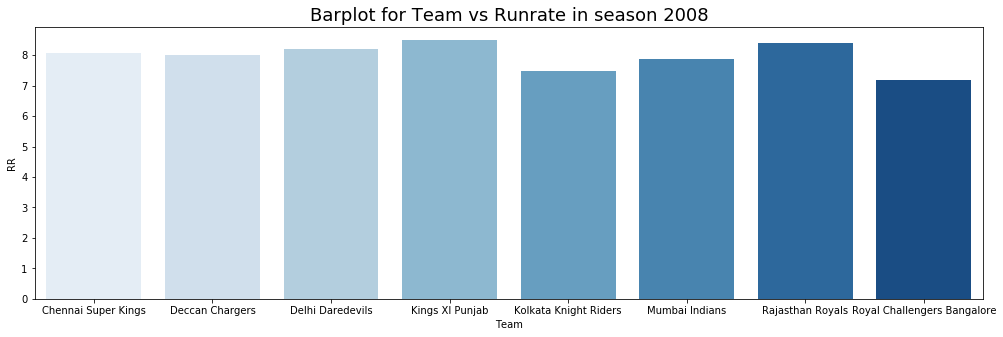

In [92]:
plt.figure(figsize=(17,5))
plt.title('Barplot for Team vs Runrate in season 2008',fontsize=18)
sns.barplot(x=df11["Team"], y=df11["RR"],palette = "Blues")

<h2> It can be inferred that all the teams had a RR of above baseline 6.0 in season 2008 with KXIP topping the chart

### **Question 12**
* Calculate a metric **%fast_innings**. This would be percentage of innings where run_rate is more than base_line run rate of **6.0 per over**
    * Which team are top 3 teams by **%fast_innings**?
    * What insights do you have about the teams against %fast_innings?
* Let's now think of how **fast** or **slow** the run was made.
  * We will create a metric which would be an indicator of speed. Let's create a metric called **dist_base_line** which means **innings_run_rate - 6.0**.
  * A **negative** value would mean slow run_rate and **positive** would mean fast. The value would mean the **intensity**. (We can say a value of 3.6-6 = -2.4 means a very slow run rate. Which a value of 10.2-6 = 3.6 as a very fast run rate)
  * For a team (chose any of your choice), visualize the distribution of negative values and do the same for positive ones. 
  * Do you find skewness? If yes, how strong is it. Discuss the interesting cases.
* Are there instances where teams are making lots of runs at a very fast pace?
  * Create a **scatter-plot** with **runs_made** on x-axis and **run_rate** on y-axis. 
  * The **color** of the dots should correspond to the team color
  * Discuss the **insights** derived. Are there teams really dominating the run making?

---------------------------

In [93]:
q12=dlv.copy()

In [94]:
q12=q12.groupby(['Match_id','year','Team','Innings']).sum().reset_index()

In [95]:
q12.head()

,Match_id,year,Team,Innings,Over,Delivery,runs_batsman,runs_extras,Runs_total
0,2008041801,2008,Kolkata Knight Riders,1,1293,124,205,17,222
1,2008041801,2008,Royal Challengers Bangalore,2,826,101,63,19,82
2,2008041901,2008,Chennai Super Kings,1,1291,124,234,6,240
3,2008041901,2008,Kings XI Punjab,2,1295,124,196,11,207
4,2008041902,2008,Delhi Daredevils,2,790,97,122,10,132


In [96]:
q12['RR']= q12.apply(lambda row:  round((row.Runs_total)/(row.Delivery/6),2), axis = 1)

In [97]:
q12['dist_base_line']=q12['RR']-6

In [98]:
teamlist=q12['Team'].unique().tolist()

In [99]:
dfObj = pd.DataFrame(columns=['Team', 'Total_Innings', 'Fast_Innings','%Fast_Innings'])


In [100]:
for x in teamlist:
    Tot_inn=len(q12[q12['Team'] == x])
    fast_inn=len(q12[(q12['Team'] == x) & (q12['RR']>6)])
    fast= round(fast_inn*100/Tot_inn,2)
    dfObj = dfObj.append({'Team' : x, 'Total_Innings' : Tot_inn, 'Fast_Innings' :fast_inn,'%Fast_Innings':fast}, ignore_index=True)

dfObj= dfObj.sort_values(by = '%Fast_Innings', ascending = False)    

In [101]:
dfObj.head(4)

,Team,Total_Innings,Fast_Innings,%Fast_Innings
13,Rising Pune Supergiant,16,16,100.00
6,Deccan Chargers,75,71,94.67
12,Gujarat Lions,31,29,93.55
1,Royal Challengers Bangalore,153,143,93.46


<h3>RPS And DC seems to have highest %fast innings

In [102]:
df12=q12[q12['Team']=='Mumbai Indians']

In [103]:
df12_n=df12[df12['dist_base_line']<=0]

In [104]:
df12_p=df12[df12['dist_base_line']>0]

Text(0.5,1,'Violin Plot for Comparing (<0) dist_base_line of Mumbai Indians in Two Innings')

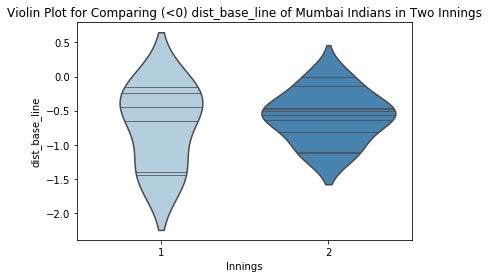

In [105]:
sns.violinplot(x=df12_n["Innings"], y=df12_n["dist_base_line"],palette = "Blues",inner = 'stick').set_title('Violin Plot for Comparing (<0) dist_base_line of Mumbai Indians in Two Innings')

<h3> It seems that Mumbai Indians have RR less than baseline mostly while chasing 

Text(0.5,1,'Violin Plot for Comparing (>0) dist_base_line of Mumbai Indians in Two Innings')

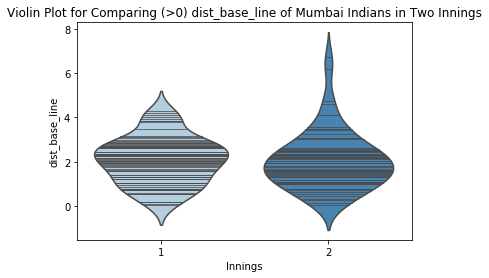

In [106]:
sns.violinplot(x=df12_p["Innings"], y=df12_p["dist_base_line"],palette = "Blues",inner = 'stick').set_title('Violin Plot for Comparing (>0) dist_base_line of Mumbai Indians in Two Innings')

<h3> It seems that Mumbai Indians can score above RR baseline  in both the innings

In [107]:
df11['Team']

0            Chennai Super Kings
1                Deccan Chargers
2               Delhi Daredevils
3                Kings XI Punjab
4          Kolkata Knight Riders
5                 Mumbai Indians
6               Rajasthan Royals
7    Royal Challengers Bangalore
Name: Team, dtype: object

In [108]:

colors = {'Chennai Super Kings':'yellow', 'Deccan Chargers':'black', 'Delhi Daredevils':'lightblue', 'Kings XI Punjab':'grey',
          'Kolkata Knight Riders': 'purple','Mumbai Indians':'blue','Rajasthan Royals':'darkblue','Royal Challengers Bangalore':'red'}


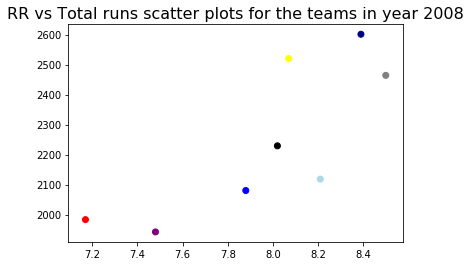

In [109]:
fig, ax = plt.subplots()

ax.scatter(df11['RR'], df11['Runs_total'], c=df11['Team'].apply(lambda x: colors[x]))
plt.title('RR vs Total runs scatter plots for the teams in year 2008',fontsize=16)
plt.show()

<h3> Rajasthan Royals and KKR score fast and scored more in 2008

### **Question 13**
* Let's analyze whether higher run_rate lead to victory?
* Create a visualization to analyze run_rates of teams in matches which it won against the ones it lost. (Hint : Box plots)
* Discuss your insights :
  * Is there a team which is really winning based on a higher run_rate maintained by them?
  * Think about a **statistical test of significance** which can help you evaluate the hypothesis mentioned in the 1st point.
    * **Reference 1 :** [Understanding the tests of significance](https://towardsdatascience.com/statistical-significance-hypothesis-testing-the-normal-curve-and-p-values-93274fa32687)
    * **Reference 2 :** [When to apply what?](https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740)
    * **Reference 3 :** [Understanding T-test](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)
  * **(Optional)**. Implement the test and explain your result

------------------

In [110]:
df13=dlv.copy()

In [111]:
df13=df13.replace({'Winner':{'Rising Pune Supergiants':'Rising Pune Supergiant'}})

In [112]:
df13=df13.replace({'Team':{'Rising Pune Supergiants':'Rising Pune Supergiant'}})

In [113]:
won=df13[df13['Winner']==df13['Team']]

In [114]:
won=won.groupby(['Match_id','Team']).sum().reset_index()

In [115]:
won['RR']= won.apply(lambda row:  round((row.Runs_total)/(row.Delivery/6),2), axis = 1)

[Text(0,0,'Kolkata Knight Riders'),
 Text(0,0,'Chennai Super Kings'),
 Text(0,0,'Delhi Daredevils'),
 Text(0,0,'Royal Challengers Bangalore'),
 Text(0,0,'Rajasthan Royals'),
 Text(0,0,'Kings XI Punjab'),
 Text(0,0,'Deccan Chargers'),
 Text(0,0,'Mumbai Indians'),
 Text(0,0,'Pune Warriors'),
 Text(0,0,'Kochi Tuskers Kerala'),
 Text(0,0,'Sunrisers Hyderabad'),
 Text(0,0,'Rising Pune Supergiant'),
 Text(0,0,'Gujarat Lions')]

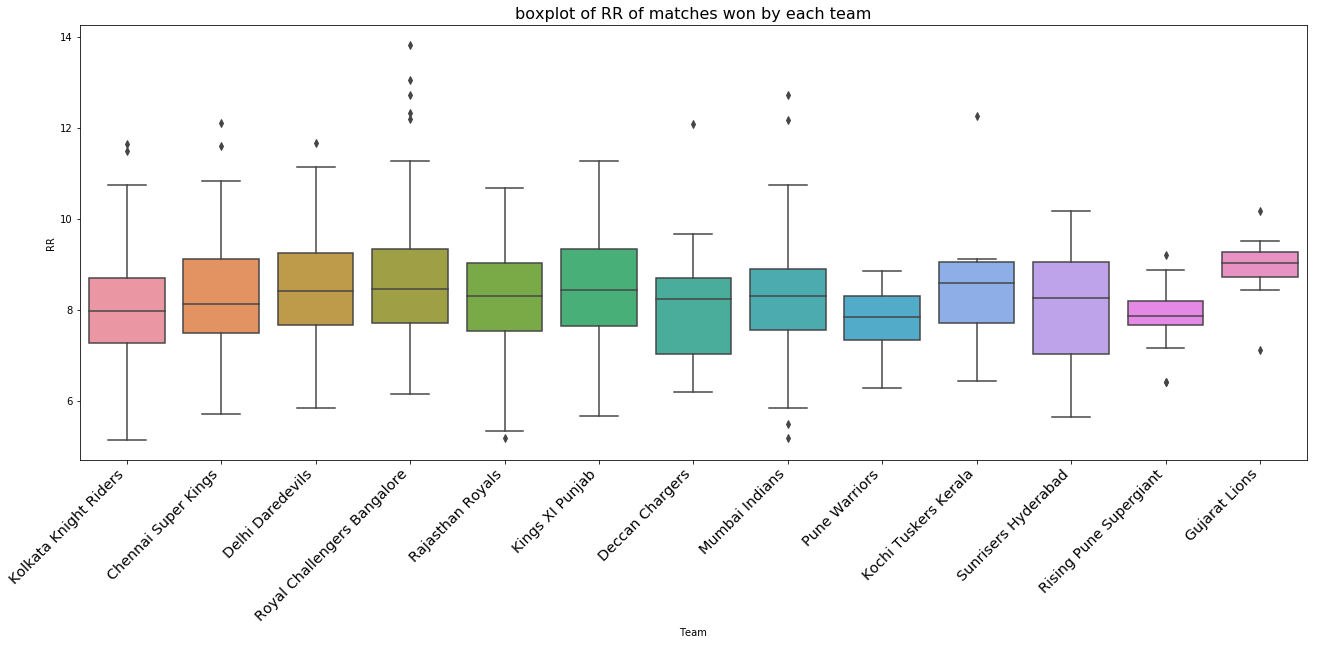

In [116]:
plt.figure(figsize=(22,8))
plt.title('boxplot of RR of matches won by each team',fontsize=16)
chart=sns.boxplot(x=won['Team'],y=won['RR'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right',fontsize='x-large')



In [117]:
lost=df13[df13['Winner']!=df13['Team']]

In [118]:
lost=lost.groupby(['Match_id','Team']).sum().reset_index()

In [119]:
lost['RR']= lost.apply(lambda row:  round((row.Runs_total)/(row.Delivery/6),2), axis = 1)

[Text(0,0,'Royal Challengers Bangalore'),
 Text(0,0,'Kings XI Punjab'),
 Text(0,0,'Rajasthan Royals'),
 Text(0,0,'Deccan Chargers'),
 Text(0,0,'Mumbai Indians'),
 Text(0,0,'Kolkata Knight Riders'),
 Text(0,0,'Delhi Daredevils'),
 Text(0,0,'Chennai Super Kings'),
 Text(0,0,'Kochi Tuskers Kerala'),
 Text(0,0,'Pune Warriors'),
 Text(0,0,'Sunrisers Hyderabad'),
 Text(0,0,'Rising Pune Supergiant'),
 Text(0,0,'Gujarat Lions')]

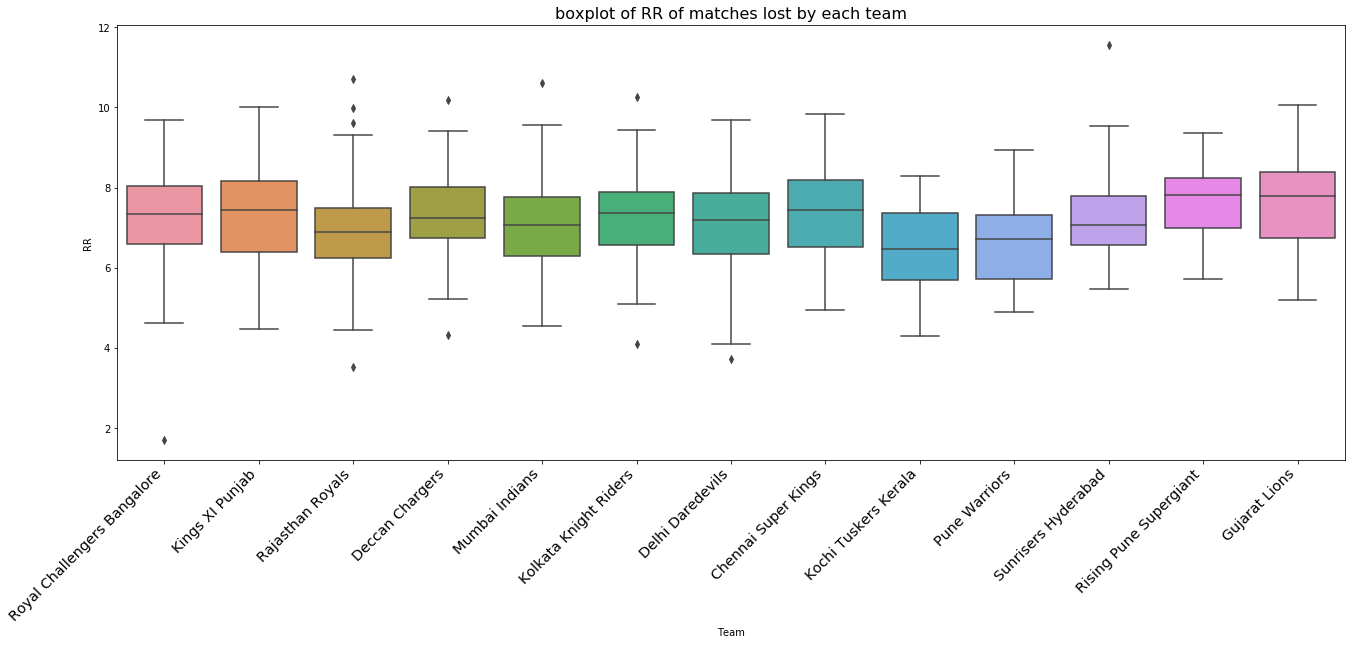

In [120]:
plt.figure(figsize=(22,8))
plt.title('boxplot of RR of matches lost by each team',fontsize=16)
chart=sns.boxplot(x=lost['Team'],y=lost['RR'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right',fontsize='x-large')

<h3> According to the boxplot everyteam has higher RR in matches won than in matches lost. Hence it can be inferred that higher RR is required for winning matches

### **Question 14**
* **Virat Kohli** is known to be a **master chaser**. Is it so? Let's validate through raw data
* Visualize the runs made by Virat Kohli in matches where his team played the **1st innings** (Hint : Use histograms)
* Visualize the runs made by Virat Kohli in matches where his team played the **2nd innings**. (Note : the 2 histograms should be plotted in the same figure)
* Interpret the histograms. Do they look cleanly **separated**?
* Create a **1X2** subplot : 
  * In subplot **(1,1)** plot the two histograms for the matches which his team won
  * In subplot **(1,2)** plot the two histograms for the matches which his team lost
  * **Discuss** your findings
    * Has Kohli been a great chaser **only** in matches won?
* Calculate Kohli's **run contribution(%)** for all matches played by him
  * Draw a violin plot of his **run_contribution(%)** for two categories : 
    * Matches **won** by his team
    * Matches **lost** by his team
  * Draw a **scatter plot** showing **run_contribution(%)** on **X-axis** and **strike_rate** on **y-axis**. Define **color** of dots as : 
    * **Green :** For matches won
    * **Red :** For matches lost
  * Discuss your insights. Do you think he has been playing captain's innings?


In [121]:
df14=dlv.copy()

In [122]:
Vk_1=df14[(df14['Batsman']=='V Kohli') & (df14['Innings']==1)]
Vk_2=df14[(df14['Batsman']=='V Kohli') & (df14['Innings']==2)]

In [123]:
Vk_1=Vk_1.groupby(['Match_id']).sum().reset_index()
Vk_2=Vk_2.groupby(['Match_id']).sum().reset_index()

In [124]:
print(Vk_1.shape[0])
print(Vk_2.shape[0])

67
75


Text(0.5,1,'V Kohli scores in 1st innings (green) and 2nd innings(blue)')

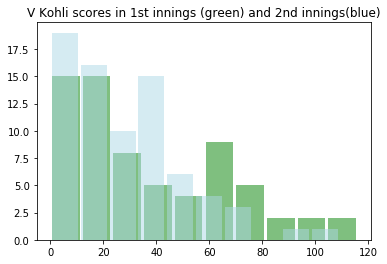

In [125]:
plt.hist(Vk_1['Runs_total'], color='green',alpha=0.5,bins=10, rwidth=0.9)
plt.hist(Vk_2['Runs_total'], color='lightblue',alpha =0.5,bins=10, rwidth=0.9)
plt.title("V Kohli scores in 1st innings (green) and 2nd innings(blue)")


<H3>Both histograms are nearly similar , except that in 2nd innings Captain VK has scored 30-40 runs more no. of times than 1st innings <br>whereas he has scored above 60 more times in 1st innings 

In [126]:
Vk_3=df14[(df14['Batsman']=='V Kohli') & (df14['Winner']=='Royal Challengers Bangalore')]
Vk_4=df14[(df14['Batsman']=='V Kohli') & (df14['Team']=='Royal Challengers Bangalore') & (df14['Winner']!='Royal Challengers Bangalore')]

In [127]:
Vk_3=Vk_3.groupby(['Match_id']).sum().reset_index()
Vk_4=Vk_4.groupby(['Match_id']).sum().reset_index()

In [128]:
print(Vk_3.shape[0])
print(Vk_4.shape[0])

65
76


(array([20., 16.,  7., 10.,  4.,  9.,  5.,  4.,  0.,  1.]),
 array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
         90.9, 101. ]),
 <a list of 10 Patch objects>)

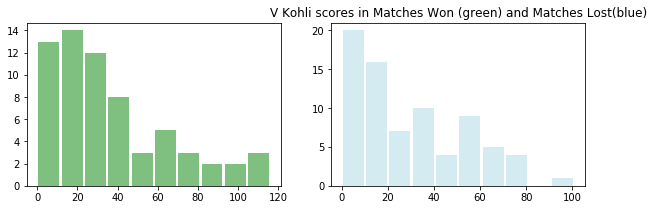

In [129]:

f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plt.title("V Kohli scores in Matches Won (green) and Matches Lost(blue)")

ax.hist(Vk_3['Runs_total'], color='green',alpha=0.5,bins=10, rwidth=0.9)

ax2.hist(Vk_4['Runs_total'], color='lightblue',alpha =0.5,bins=10, rwidth=0.9)


<h3> According to this it can be infered that RCB has higher chances of winning when captain VK scores

In [130]:
rcb1=df14[(df14['Team']=='Royal Challengers Bangalore')&(df14['Winner']=='Royal Challengers Bangalore')]
rcb2=df14[(df14['Team']=='Royal Challengers Bangalore')&(df14['Winner']!='Royal Challengers Bangalore')]

In [131]:
rcb1=rcb1.groupby(['Match_id']).sum().reset_index()
rcb2=rcb2.groupby(['Match_id']).sum().reset_index()

In [132]:
rcb1=rcb1[['Match_id','Runs_total']]
rcb2=rcb2[['Match_id','Runs_total']]


In [133]:
list1=Vk_3['Match_id'].tolist()
list2=Vk_4['Match_id'].tolist()

In [134]:
rcb1 = rcb1[rcb1['Match_id'].isin(list1)].reset_index()
rcb2=rcb2[rcb2['Match_id'].isin(list2)].reset_index()

In [135]:
for i in range(0,len(rcb1)):
    x=rcb1.loc[i,'Match_id']
    rcb1.loc[i,'Vk']=Vk_3.loc[Vk_3['Match_id']==x,'Runs_total'].values[0]
    rcb1.loc[i,'VkBalls']=Vk_3.loc[Vk_3['Match_id']==x,'Delivery'].values[0]

In [136]:
for i in range(0,len(rcb2)):
    x=rcb2.loc[i,'Match_id']
    rcb2.loc[i,'Vk']=Vk_4.loc[Vk_4['Match_id']==x,'Runs_total'].values[0]
    rcb2.loc[i,'VkBalls']=Vk_4.loc[Vk_4['Match_id']==x,'Delivery'].values[0]

In [137]:
rcb1['Vk_Contribution%']= rcb1.apply(lambda row:  round((row.Vk)*100/(row.Runs_total),2), axis = 1)
rcb2['Vk_Contribution%']= rcb2.apply(lambda row:  round((row.Vk)*100/(row.Runs_total),2), axis = 1)
rcb1['Vk_SR%']= rcb1.apply(lambda row:  round((row.Vk)*100/(row.VkBalls),2), axis = 1)
rcb2['Vk_SR%']= rcb2.apply(lambda row:  round((row.Vk)*100/(row.VkBalls),2), axis = 1)

Text(0.5,1,'Violin Plot for run contribution of V Kohli in Matches Won')

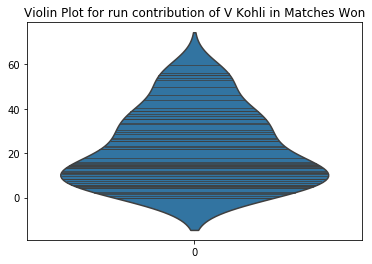

In [138]:
sns.violinplot(data = rcb1['Vk_Contribution%'],inner = 'stick').set_title('Violin Plot for run contribution of V Kohli in Matches Won')

Text(0.5,1,'Violin Plot for run contribution of V Kohli in Matches lost')

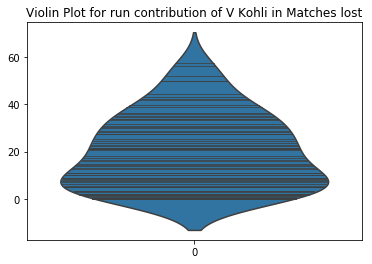

In [139]:
sns.violinplot(data = rcb2['Vk_Contribution%'],inner = 'stick').set_title('Violin Plot for run contribution of V Kohli in Matches lost')

<b> We can observe that Virat Kohli's run contribution is a significant factor for RCB to win

Text(0.5,1,'Scatter plot for V kohli run_contribution% vs SR for matches won(green) and lost(red)')

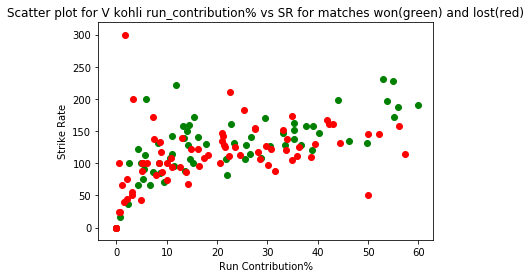

In [140]:
ax = plt.gca()

ax.scatter(rcb1['Vk_Contribution%'], rcb1['Vk_SR%'], color='green')
ax.scatter(rcb2['Vk_Contribution%'], rcb2['Vk_SR%'], color='red')
ax.set_xlabel("Run Contribution%")
ax.set_ylabel("Strike Rate")

plt.title('Scatter plot for V kohli run_contribution% vs SR for matches won(green) and lost(red)')

<h3> Gradually as the run contribution of VK increases his SR increases, and it is also evident that for winning the match he needs to contribute more and naturally his SR will also increase

### **Question 15**
* Consider you are part of **team selection committee** for your team
* You are required to suggest **best nominations** for selection of **batsmen** during the team auctions
* Your team owner wants a **good mix** of batsmen who can exhibit the below **traits** :
  * Aggression
  * Consistency
  * Can hit at will
  * Pinch hitters
  * Sheet Anchors
  * Match finishers
* Use the data provided to you to create an exhaustive **list of metrics** which can demonstrate **quality** of a given batsman
* Apply **suitable machine learning** techniques to generate **clusters** of batsmen
* **Analyze** the clusters for **batting traits** and name them suitably
* **Discuss** your outcomes 

In [141]:
df15=pd.read_csv('ipl_battingnew.csv')

In [142]:
df15=df15[['batsmen','B','SR']]

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

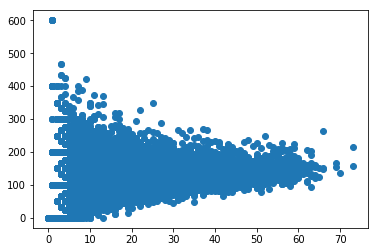

In [144]:
plt.scatter(df15['B'],df15['SR'],label='True Position')


In [145]:
kmeans = KMeans(n_clusters=12)

y = kmeans.fit_predict(df15[['B','SR']])

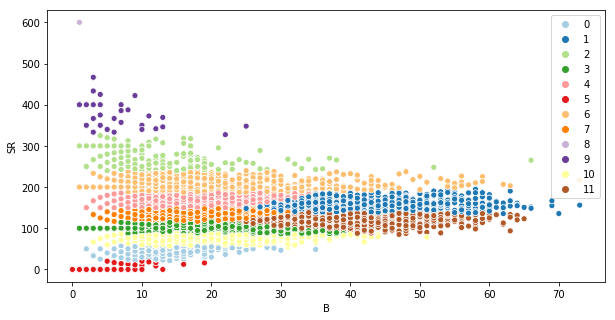

In [146]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="B", y="SR", hue=y,data=df15,palette='Paired',legend='full')

In [147]:
df15['category']=y

In [148]:
df15['category']=df15['category'].astype(str)


<h3> From the clusters formed for SR vs Balls we can determine different players for different roles based on the frequency of a particular type of inning

<h3> AGGRESIVE players belong to cluster number 6 as the SR is almost near 250, following are the players who have played this role most frequently

In [155]:
df15[df15['category']=='6']['batsmen'].value_counts().head(5)

AB de Villiers    23
MS Dhoni          23
V Sehwag          18
CH Gayle          17
KA Pollard        17
Name: batsmen, dtype: int64

<h3> For CONSISTENCY we can consider cluster 11

In [156]:
df15[df15['category']=='11']['batsmen'].value_counts().head(5)

S Dhawan     36
AM Rahane    35
V Kohli      33
G Gambhir    32
R Dravid     24
Name: batsmen, dtype: int64

<h3> Players who can HIT AT WILL belong to cluster 4 

In [161]:
df15[(df15['category']=='4')]['batsmen'].value_counts().head(5)

YK Pathan       27
RV Uthappa      26
MS Dhoni        24
SK Raina        23
Yuvraj Singh    23
Name: batsmen, dtype: int64

<h3> PINCH HITTERS are those who can be sent for a short while to increase the RR, here they belong to Cluster 2 and 9

In [158]:
df15[(df15['category']=='2') | (df15['category']=='9')]['batsmen'].value_counts().head(5)

AD Russell        10
KA Pollard        10
YK Pathan          9
SP Narine          9
AB de Villiers     8
Name: batsmen, dtype: int64

<h3> SHEET ANCHORS are responsible for maintaining their wicket and letting others take the risk, i.e Cluster 3 and 7

In [159]:
df15[(df15['category']=='3') | (df15['category']=='7')]['batsmen'].value_counts().head(5)

SK Raina     60
S Dhawan     56
MS Dhoni     53
V Kohli      52
RG Sharma    51
Name: batsmen, dtype: int64

<h3> MATCH FINISHERS belong to cluster 1 for scoring at higher SR and playing most number of balls

In [160]:
df15[df15['category']=='1']['batsmen'].value_counts().head(5)

RG Sharma    30
SK Raina     27
DA Warner    24
V Kohli      23
CH Gayle     20
Name: batsmen, dtype: int64